In [2]:
import geopandas
import pandas
import matplotlib.pyplot as plt

In [8]:
def polygon_to_point(df):
            df_with_centroid = df.copy()
            df_with_centroid['geometry'] = df.centroid

            return df_with_centroid

        # Join all points that lie in a polygon with that feature
def find_intersects(df_polygon, df_centroids):
#     def subsetter(df):
        
#         subset = geopandas.sjoin(df, df_centroid)
        
#         return subset
        
#     datasubset = [geopandas.sjoin(df_polygon.loc[[k]], df_centroids)
#                   for k in df_polygon.index]
    df_polygon.apply(geopandas.sjoin, axis=1, args=(df_centroids,))
    
    return pandas.concat(datasubset)

def source_aggregator(self, fieldname):
        source_data=self.source_df
        lots_data=self.blocks_in_parcels

        # Group lots_data by lot index, then sum all values under fieldname

        data_sums = lots_data.groupby('BBL').sum()[fieldname]
        lotnames = data_sums['BBL'].unique()

        # Write the sums to their respective lots in parcel_df
        self.parcels_df.loc[data_sums.index, fieldname] = data_sums.values

        return None

In [3]:
parcels = geopandas.read_file('testdata/MN_PLUTO_SUBSET.shp')
source = geopandas.read_file('testdata/nad_subset.shp')

In [4]:
parcel_centroids = polygon_to_point(parcels)
source_centroids = polygon_to_point(source)

In [10]:
import time

start = time.time()

blocks_in_parcels = find_intersects(parcels, source_centroids)

print(time.time() - start)

parcels_in_blocks = find_intersects(source, parcel_centroids)

print(time.time() - start)

AttributeError: ("'Series' object has no attribute 'crs'", 'occurred at index 0')

In [7]:
blocks_in_parcels.shape

(89, 101)

In [8]:
blocks_in_parcels_onlydupes = blocks_in_parcels[blocks_in_parcels.index.duplicated(keep=False)]
parcels_in_blocks_onlydupes = parcels_in_blocks[parcels_in_blocks.index.duplicated(keep=False)]
print(blocks_in_parcels.shape)

(89, 101)


(986936.5170825669, 992292.7943654801, 202892.2989495394, 207860.78133141148)

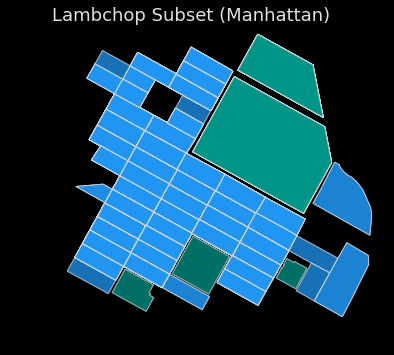

In [23]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 10), facecolor='black')
blocks_in_parcels_onlydupes.plot(edgecolor='#E0E0E0', color='#009688', ax=ax, alpha=.5)
parcels_in_blocks_onlydupes.plot(edgecolor='#E0E0E0', color='#2196F3', ax=ax, alpha=.5)
ax.set_title('Lambchop Subset (Manhattan)', color='#E0E0E0', 
             loc='left', 
             fontsize=18,
            pad=0)
plt.axis('off')

In [40]:
popsums = blocks_in_parcels_onlydupes.groupby('BBL').sum()['POP10']
popsums

BBL
1.003820e+09      951
1.004030e+09       74
1.004320e+09     1628
1.009720e+09    16538
1.009780e+09     4511
Name: POP10, dtype: int64

In [21]:
blocks_in_parcels_onlydupes['BBL'].unique()
parcels.set_index('BBL', inplace=True)


array([1.0038201e+09, 1.0043200e+09, 1.0040300e+09, 1.0097800e+09,
       1.0097200e+09])

In [64]:
parcels.loc[popsums.index, 'POP10'] = popsums.values
parcels.loc[popsums.index]

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_area,SHAPE_len,geometry,POP10
BBL,,,,,,,,,,,,,,,,,,,,,
1.003820e+09,951,951,951,951,951,951,951,951,951,951,...,951,951,951,951,951,951,951.0,951.0,951,951
1.004030e+09,951,951,951,951,951,951,951,951,951,951,...,951,951,951,951,951,951,951.0,951.0,951,74
1.004320e+09,951,951,951,951,951,951,951,951,951,951,...,951,951,951,951,951,951,951.0,951.0,951,1628
1.009720e+09,951,951,951,951,951,951,951,951,951,951,...,951,951,951,951,951,951,951.0,951.0,951,16538
1.009780e+09,951,951,951,951,951,951,951,951,951,951,...,951,951,951,951,951,951,951.0,951.0,951,4511


In [65]:
parcels['POP10'].describe()

count     1214.000000
mean        19.523888
std        494.780732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      16538.000000
Name: POP10, dtype: float64